# Daten aufbereiten

Viele Zeitreihenanalyseverfahren erwarten äuqidistante Punkte. Manchesmal sind auch Datenreihen unvollständig. Python stellt eine Reihe von Verfahren bereit, um ungültige oder fehlende Werte zu ergänzen.

* Datenhygiene
* Gruppieren
* Kopieren des vorangegangenen/nachfolgenden Werts
* Interpolieren (linear, polynom, spline)



## Dateneingabe

* Einlesen der Daten
* Blick auf die Daten


In [1]:
%reset -f
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fn = 'data/demo_tdaily_imp.csv'
#fn = 'data/demo_co2_imp.csv'

df = pd.read_csv(fn) #, index_col=0)
# short form
#df = pd.read_csv(fn, parse_dates=[0], index_col=0)
df.head(3)


/home/rp/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


,date,mydat,myimp
0,1981-02-19,16.1,16.1
1,1981-02-20,15.7,15.7
2,1981-02-21,16.6,16.6


In [2]:
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index, format ='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 1981-02-19 to 1983-03-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mydat   750 non-null    float64
 1   myimp   565 non-null    float64
dtypes: float64(2)
memory usage: 17.6 KB


In [2]:
df = df.set_index(['date'])
df.index = pd.to_datetime(df.index, format ='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 750 entries, 1981-02-19 to 1983-03-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mydat   750 non-null    float64
 1   myimp   565 non-null    float64
dtypes: float64(2)
memory usage: 17.6 KB


> <class 'pandas.core.frame.DataFrame'>  
> DatetimeIndex: 94 entries, 2020-09-20 to 2022-07-03  

Index "date" wurde als Datum erkannt. 

In [3]:
df.describe()

,mydat,myimp
count,750.000000,565.000000
mean,11.113600,11.328319
std,4.438637,4.369500
min,0.000000,0.000000
25%,7.825000,8.300000
50%,11.000000,11.300000
75%,14.100000,14.300000
max,26.300000,25.200000


`count` erkennt in *mydat* und *myimp* unterschiedliche Zahl von Einträgen.

In [4]:
display(df.isnull().sum())
print('\nper cent:')
display(df.isnull().mean()*100)

mydat      0
myimp    185
dtype: int64


per cent:


mydat     0.000000
myimp    24.666667
dtype: float64

<Axes: >

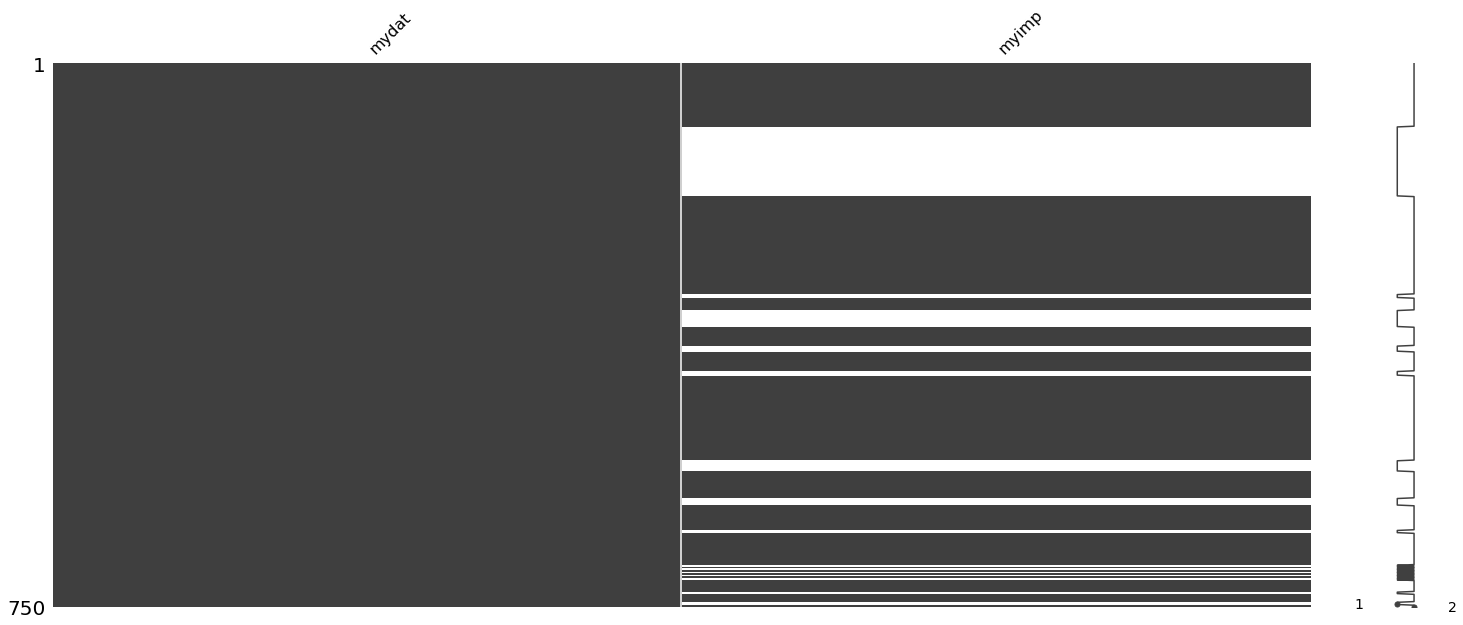

In [5]:
import missingno as msno

msno.matrix(df)

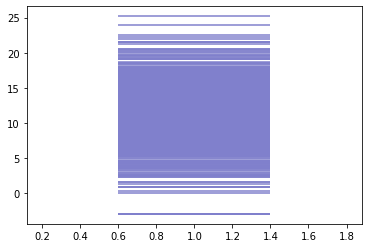

In [6]:
dg = df['myimp'].copy()
bad = dg.isnull()
dg[bad] = -3

plt.eventplot(dg, #df.iloc[:,1].to_numpy(), 
			  orientation = 'vertical',
			  linelengths = 0.8, 
			  color = [(0.5,0.5,0.8)])
plt.show()

<Axes: xlabel='date'>

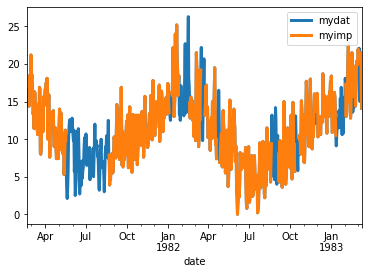

In [7]:
df.plot(lw=3)

## Gruppieren

Das Verfahren *resample* gruppiert über Zeitintervalle, beispielsweise über Monate ("M"). Kleine Lücken lassen sich ausgleichen, sofern mindestens ein Wert in diesem Intervall liegt.

Im folgenden Beispiel werden die Lücken im Januar bis Juli 2022 geschlossen, die in 2021 ist zu groß. Alternativ könnte über 4 Monate ("4M") gemittelt werden.

<Axes: xlabel='date'>

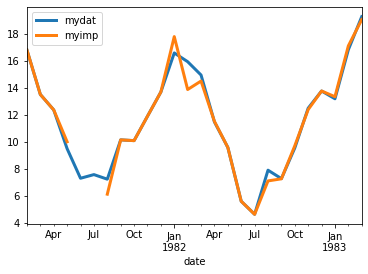

In [8]:
dg = df.copy()
dg = dg.resample("M").agg('mean')
#dg = dg.resample("4M").agg('mean')
dg.plot(lw=3)

*resample* fasst Zeitintervalle zusammen. Oder der Befehl erzeugt Lücken, nämlich dann, wenn innerhalb eines Zeitintervalls keine Zeitwerte vorliegen.

## Löschen

Zeilen mit fehlenden Werten oder ungültigen Werten könnten gelöscht werden.

<Axes: xlabel='date'>

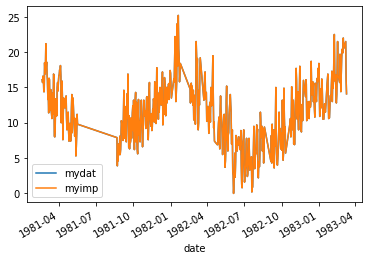

In [9]:
dg = df.copy()
dg.dropna(axis=0, how='any', inplace=True)
dg.plot()

Problem: Daten sind nicht mehr äquidistant.

## Interpolieren

Vorher -> Nachher

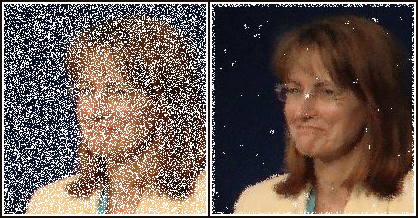

&nbsp;

Wer es nicht glaubt, öffnet das Bild mit einem Bildbearbeitungsprogramm.

Gimp / Filters / Enhance / Despeckle 

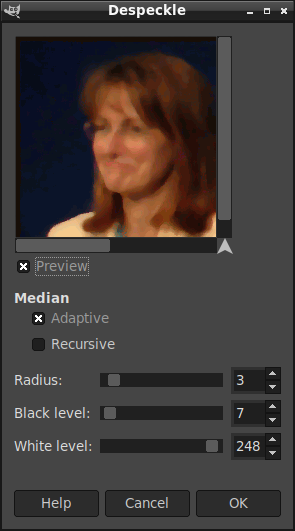


Größe fehlender Werte aus der der Nachbarwerte abschätzen:
    
    

In [10]:
dg = df.copy()
dg['mean']= dg['myimp'].fillna(dg['myimp'].mean())
dg['bfill']= dg['myimp'].bfill() # fillna(method = 'bfill') #ffill : Backward/forward fill the values.
dg['410']= dg['myimp'].fillna(410)
dg.head()

,mydat,myimp,mean,bfill,410
date,,,,,
1981-02-19,16.1,16.1,16.1,16.1,16.1
1981-02-20,15.7,15.7,15.7,15.7,15.7
1981-02-21,16.6,16.6,16.6,16.6,16.6
1981-02-22,16.5,16.5,16.5,16.5,16.5
1981-02-23,14.4,14.4,14.4,14.4,14.4


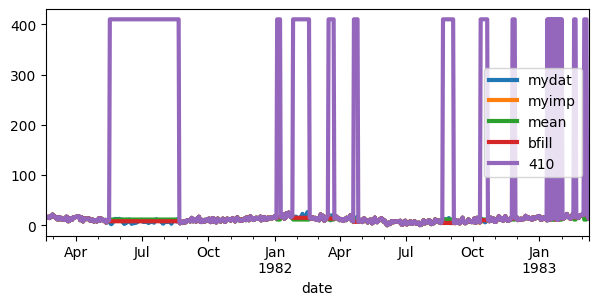

In [11]:
fig, ax = plt.subplots(1, figsize=(7,3) , dpi=100)
dg.plot(lw=3, ax=ax)
plt.show()

<Axes: xlabel='mydat', ylabel='mean'>

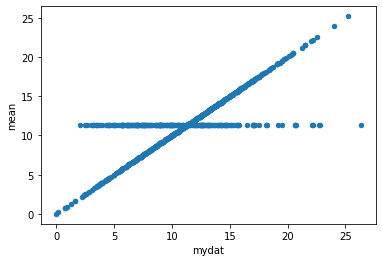

In [12]:
dg.plot.scatter('mydat', 'mean')

Interpolation:

'linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline'

<Axes: xlabel='date'>

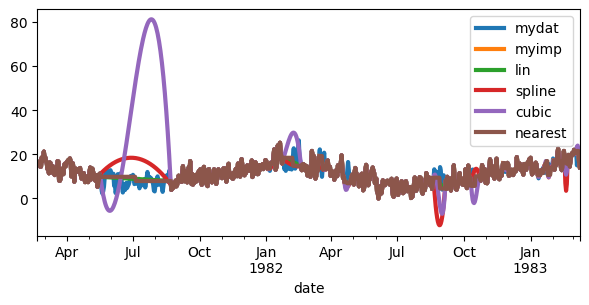

In [13]:
dg = df.copy()
dg['lin'] = dg['myimp'].interpolate(method = 'linear')
dg['spline'] = dg['myimp'].interpolate(method = 'spline', order=2)
dg['cubic'] = dg['myimp'].interpolate(method = 'cubic')
dg['nearest'] = dg['myimp'].interpolate(method = 'nearest')

fig, ax = plt.subplots(1, figsize=(7,3) , dpi=100)
dg.plot(lw=3, ax=ax)

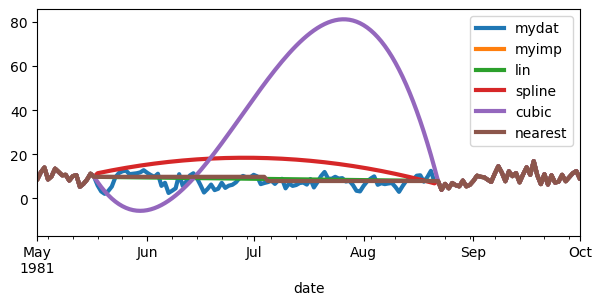

In [14]:
fig, ax = plt.subplots(1, figsize=(7,3) , dpi=100)
dg.plot(lw=3, ax=ax)
ax.set_xlim('1981-05','1981-10')
plt.show()


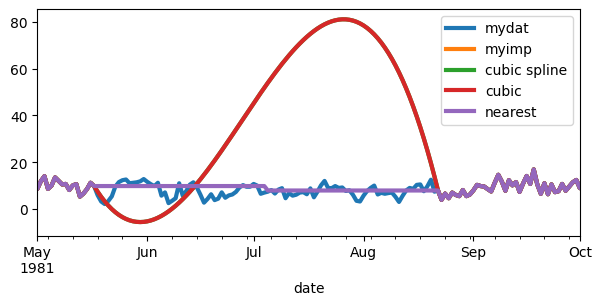

In [15]:
dg = df.copy()

dg['cubic spline'] = dg['myimp'].interpolate(method = 'cubicspline')
dg['cubic'] = dg['myimp'].interpolate(method = 'cubic')
dg['nearest'] = dg['myimp'].interpolate(method = 'nearest')

fig, ax = plt.subplots(1, figsize=(7,3) , dpi=100)
dg.plot(lw=3, ax=ax)
ax.set_xlim('1981-05','1981-10')
plt.show()

Interpolationsverfahren reagieren sensiblel auf Rauschen.

## Intelligent interpolieren

Darüber hinaus gibt es weitere Verfahren, weitere Informationen für die Interpolation heranzuziehen, beispielseise durch eine angenommene Korrelation mit Nachbarspalten.

Mulitvariate Imputation.

Verfahren beispielsweise: Bayes, Random Forest, KNN

## Zusammenfassung

1. Datumstring in Datum-Format umwandeln.
2. Datum als Index übernehmen.
3. Resamplen. Dadurch werden Datumswerte:
    * eindeutig (Mehrfach auftretende Datumswerte werden zusammengefasst).
    * äquidistant
    * einsam; möglicherweise fehlt zugehöriger Wert.
4. Interploieren. Der Befehl füllt mögliche Lücken (*NaN*-Werte).

In [16]:
%reset -f

import pandas as pd

df = pd.DataFrame({'date': ['2010-01-01', '2010-01-02', '2010-01-02', 
                            '2010-01-03', '2010-01-05', '2010-01-01'], 
                   'val': [1,2,3,4,8,20]})
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(df.iloc[:,0])
df = df.resample("d").agg('mean')
print('nan: ', df.isna().sum())
df = df.drop(['date'], axis=1)
df = df.interpolate()
df

nan:  date    1
val     1
dtype: int64


,val
date,
2010-01-01,10.5
2010-01-02,2.5
2010-01-03,4.0
2010-01-04,6.0
2010-01-05,8.0
